<a href="https://colab.research.google.com/github/aljeshishe/notebooks/blob/master/How_much_samples_is_enough_for_transfer_learning_same_steps_per_epoch_InceptionResNetV2_10_50_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install kaggle -q

In [0]:
import json
token = {'username':'aljeshishe','key':'32deca82aa1c29fbaeadcce2bf470af4'}
with open('kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.6MB/s]
 96% 521M/543M [00:06<00:00, 77.6MB/s]
100% 543M/543M [00:06<00:00, 82.7MB/s]
 95% 258M/271M [00:03<00:00, 59.3MB/s]
100% 271M/271M [00:03<00:00, 72.9MB/s]


In [5]:
!unzip test1.zip
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [6]:
import tensorflow as tf
import os
# use gpu/cpu/tpu
# see details in https://colab.research.google.com/drive/1cpuwjKTJbMjlvZ7opyrWzMXF_NYnjkiE#scrollTo=y3gk7nSvTUFZ
gpus = tf.config.experimental.list_physical_devices('GPU')
COLAB_TPU_ADDR = os.environ.get('COLAB_TPU_ADDR')
if COLAB_TPU_ADDR:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + COLAB_TPU_ADDR)
  tf.config.experimental_connect_to_cluster(resolver)
  # This is the TPU initialization code that has to be at the beginning.
  tf.tpu.experimental.initialize_tpu_system(resolver)
  strategy = tf.distribute.experimental.TPUStrategy(resolver)
  print('Running on TPU ')  
elif len(gpus) > 1:
  strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
  print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on single GPU ', gpus[0].name)
else:
  strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
  print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)
!nvidia-smi

Running on single GPU  /physical_device:GPU:0
Number of accelerators:  1
Sun May 10 21:12:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:   

In [7]:
from google.colab import drive
drive.mount('/content/drive')

def notebook_name():
  import re
  import ipykernel
  import requests

  from notebook.notebookapp import list_running_servers
  # kernel_id = re.search('kernel-(.*).json', ipykernel.connect.get_connection_file()).group(1)
  for ss in list_running_servers():
      response = requests.get(f'{ss["url"]}api/sessions',params={'token': ss.get('token', '')})
      return response.json()[0]['name']


project, _, _ = notebook_name().rpartition('.')

import re 
project = re.sub('[^-a-zA-Z0-9_]+', '_', project)

working_dir = f'/content/drive/My Drive/Colab Notebooks/{project}'
print(f'Current project: {project}')
print(f'Places at: {working_dir}')

import pathlib
pathlib.Path(working_dir).mkdir(parents=True, exist_ok=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Current project: Copy_20of_20How_much_samples_is_enough_for_transfer_learning_same_steps_per_epoch_InceptionResNetV2
Places at: /content/drive/My Drive/Colab Notebooks/Copy_20of_20How_much_samples_is_enough_for_transfer_learning_same_steps_per_epoch_InceptionResNetV2


In [8]:
!pip install wandb -q
!WANDB_API_KEY=723983b2d42ccd7c5510bbeb0549aa73f1242844
!export WANDB_API_KEY

import wandb
wandb.init(project=project, dir=working_dir, config=config)
conf = wandb.config

     |████████████████████████████████| 1.4MB 11.7MB/s 
     |████████████████████████████████| 460kB 53.5MB/s 
     |████████████████████████████████| 112kB 58.0MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

train_dir = 'train/'
test_dir = 'test1/'
filenames = os.listdir(train_dir)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("1")
    else:
        categories.append("0")

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras.callbacks import EarlyStopping
import wandb
from wandb.keras import WandbCallback

def run(samples):
    conf.batch_size = 64,          # input batch size for training (default: 64)
    conf.epochs = 20,             # number of epochs to train (default: 10)
    conf.lr = 1e-4,               # learning rate (default: 0.01)
    conf.momentum = 0.9,          # SGD momentum (default: 0.5) 
    conf.steps_per_epoch = 20000/64, # shoud be total_train//config.batch_size

    df = pd.DataFrame({
        'filename': filenames,
        'category': categories
    })
    df.head()

    image_size = 224
    input_shape = (image_size, image_size, 3)

    epochs = config.epochs
    batch_size = 16

    pre_trained_model = InceptionResNetV2(input_shape=input_shape, include_top=False, weights="imagenet")
    pre_trained_model.summary()

    for layer in pre_trained_model.layers[:15]:
        layer.trainable = False

    for layer in pre_trained_model.layers[15:]:
        layer.trainable = True

    last_layer = pre_trained_model.get_layer('conv_7b_ac')
    last_output = last_layer.output

    x = GlobalMaxPooling2D()(last_output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    model = Model(pre_trained_model.input, x)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=config.lr, momentum=config.momentum),
                  metrics=['accuracy'])

    train_df, validate_df = train_test_split(df, test_size=0.1)
    train_df = train_df.reset_index()
    validate_df = validate_df.reset_index()

    validate_df = validate_df.sample(n=2000).reset_index() # use for fast testing code purpose
    train_df = train_df.sample(n=samples).reset_index() # use for fast testing code purpose

    total_train = train_df.shape[0]
    total_validate = validate_df.shape[0]

    train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1
    )

    train_generator = train_datagen.flow_from_dataframe(
        train_df, 
        train_dir, 
        x_col='filename',
        y_col='category',
        class_mode='binary',
        target_size=(image_size, image_size),
        batch_size=batch_size
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_dataframe(
        validate_df, 
        train_dir, 
        x_col='filename',
        y_col='category',
        class_mode='binary',
        target_size=(image_size, image_size),
        batch_size=batch_size
    )

    # fine-tune the model
    history = model.fit_generator(
        train_generator,
        epochs=config.epochs,
        validation_data=validation_generator,
        validation_steps=total_validate//config.batch_size,
        steps_per_epoch=config.steps_per_epoch,
        verbose=2,
        callbacks=[WandbCallback(save_model=True,
                                      verbose=1)])
        #EarlyStopping(monitor='val_loss'), 
    return history


In [11]:
counts = [10, 50, 100]
results = []
results_count = []
for count in counts:
  h = run(count)
  results.append(h.history)
  results_count.append(count)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


219062272/219055592 [==============================] - 18s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 111, 111, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 111, 111, 32) 0           batch_normalization_204[0][0]    
________________________________________________________________________________

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, 111, 111, 32) 96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, 111, 111, 32) 0           batch_normalization_407[0][0]    
________________________________________________________________________________

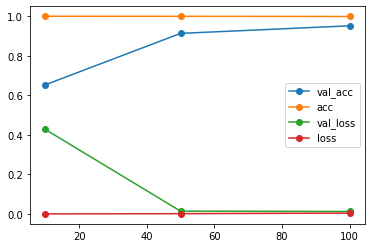

In [12]:
val_acc = [(i, max(result['val_accuracy'])) for i, result in zip(results_count, results)]
acc = [(i, max(result['accuracy'])) for i, result in zip(results_count, results)]
val_loss = [(i, min(result['val_loss'])) for i, result in zip(results_count, results)]
loss = [(i, min(result['loss'])) for i, result in zip(results_count, results)]
import matplotlib.pyplot as plt
plt.plot(*zip(*val_acc), '-o', label='val_acc')
plt.plot(*zip(*acc), '-o', label='acc')
plt.plot(*zip(*val_loss), '-o', label='val_loss')
plt.plot(*zip(*loss), '-o', label='loss')
plt.legend()

In [13]:
val_acc

[(10, 0.6532257795333862), (50, 0.913306474685669), (100, 0.9516128897666931)]

https://app.wandb.ai/grachev/Copy_20of_20How_much_samples_is_enough_for_transfer_learning_same_steps_per_epoch_InceptionResNetV2?workspace=user-grachev



**500 samples is ok for binary classification**